# Overview of the Project

In this Project we will focus on credit modelling, a well-known data science problem that focuses on modeling a borrower's credit risk. Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from Lending Club. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back.Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers default on the loan.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In our project we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we will need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

## About Dataset

We have a approved loans dataset from 2007-2011 from lending club contains information on current loans, completed loans, and defaulted loans.

Machine Learning Problem : Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?



# Exploratory Data Analysis(EDA)

Let's explore the dataset and do some data cleaning,feature enigineering and selection if required and prepare the data for application of machine learning model to make predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
# Reading Dataset
loans = pd.read_csv('loans_2007.csv')

C:\Users\Koushik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [4]:
loans.shape

(42538, 52)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

Data Frame contains 42,538 rows and 52 columns so there are many columns in dataframe now let's look all columns and try to understand which features are useful and which is not useful based on domain knowledge and make feature selection process.

There are total 52 columns we will look set of 18 columns each to know which columns are really useful for our prediction

I have a data dictionary consists information about all columns https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097

id -	object	-	A unique LC assigned ID for the loan listing.

member_id -	float64	 - 	A unique LC assigned Id for the borrower member.

loan_amnt - float64	-	The listed amount of the loan applied for by the borrower.

funded_amnt	- float64 -	The total amount committed to that loan at that point in time.

funded_amnt_inv	- float64 - The total amount committed by investors for that loan at that point in time.

term -	object	-	The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate -	object - Interest Rate on the loan

installment - 	float64 -	The monthly payment owed by the borrower if the loan originates.

grade -	object - LC assigned loan grade

sub_grade - object - LC assigned loan subgrade

emp_title -	object - The job title supplied by the Borrower when applying for the loan.

emp_length - object	-	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership - object - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

annual_inc - float64	-	The self-reported annual income provided by the borrower during registration.

verification_status -	object	-	Indicates if income was verified by LC, not verified, or if the income source was verified

issue_d - object - The month which the loan was funded

loan_status - object -	Current status of the loan

pymnt_plan -	object	-	Indicates if a payment plan has been put in place for the loan

purpose - object - A category provided by the borrower for the loan request.

After Analyzing some columns there the columns which is generated id for each record and there are some columns which data leakage from feature i.e which now in training data these are available but while predicting loan can be paid off or not these columns are not useful for our model.

id: randomly generated field by Lending Club for unique identification purposes only

member_id: also a randomly generated field by Lending Club for unique identification purposes only

funded_amnt: leaks data from the future (after the loan is already started to be funded)

funded_amnt_inv: also leaks data from the future (after the loan is already started to be funded)

grade: contains redundant information as the interest rate column (int_rate)

sub_grade: also contains redundant information as the interest rate column (int_rate)

emp_title: requires other data and a lot of processing to potentially be useful

issue_d: leaks data from the future (after the loan is already completely funded)

             Grade and SubGrade are categorical and created based on intrest rate which is continuous variable which is useful for our machine learning.

So we can drop the above columns which are not useful for our modeling

In [6]:
loans_d = loans.copy()

In [7]:
loans_d.drop(['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d'],axis=1,inplace=True)

Now let's look next 18 columns for feature selection

title -	object	-	The loan title provided by the borrower

zip_code -	object	-	The first 3 numbers of the zip code provided by the borrower in the loan application.

addr_state - object	-	The state provided by the borrower in the loan application

dti - float64 -	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

delinq_2yrs	- float64	-	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

earliest_cr_line -	object - The month the borrower's earliest reported credit line was opened

inq_last_6mths - float64 - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

open_acc -	float64 -	The number of open credit lines in the borrower's credit file.

pub_rec - float64	-	Number of derogatory public records

revol_bal -	float64	-	Total credit revolving balance

revol_util - object	-	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc -	float64	- The total number of credit lines currently in the borrower's credit file

initial_list_status -	object	-	The initial listing status of the loan. Possible values are – W, F

out_prncp -	float64	-	Remaining outstanding principal for total amount funded

out_prncp_inv -	float64	-	Remaining outstanding principal for portion of total amount funded by investors

total_pymnt - float64 - Payments received to date for total amount funded

total_pymnt_inv -	float64	-	Payments received to date for portion of total amount funded by investors

total_rec_prncp - float64	- principal received to date

In the above columns some columns again found which are from future and some redundunt columns

zip_code: redundant with the addr_state column since only the first 3 digits of the 5-digit zip code are visible (which can only be used to identify the state the borrower lives in)

out_prncp: leaks data from the future, (after the loan already started to be paid off)

out_prncp_inv: also leaks data from the future, (after the loan already started to be paid off)

total_pymnt: also leaks data from the future, (after the loan already started to be paid off)

total_pymnt_inv: also leaks data from the future, (after the loan already started to be paid off)

total_rec_prncp: also leaks data from the future, (after the loan already started to be paid off)

The columns out_prncp and out_prncp_inv both describe the outstanding principal amount for a loan, which is the remaining amount the borrower still owes. These 2 columns as well as the total_pymnt column describe properties of the loan after it's fully funded and started to be paid off. This information isn't available to an investor before the loan is fully funded and we don't want to include it in our model.

In [8]:
loans_d.drop(['zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'],axis=1,inplace=True)

Last set of 18 columns

total_rec_int -	float64	-	Interest received to date

total_rec_late_fee - float64	-	Late fees received to date

recoveries - float64 - post charge off gross recovery

collection_recovery_fee	- float64	-	post charge off collection fee

last_pymnt_d -	object - Last month payment was received

last_pymnt_amnt - float64	- Last total payment amount received

last_credit_pull_d - object	-	The most recent month LC pulled credit for this loan

collections_12_mths_ex_med - float64 - Number of collections in 12 months excluding medical collections

policy_code -	float64	-	publicly available policy_code=1 new products not publicly available policy_code=2

application_type -	object - Indicates whether the loan is an individual application or a joint application with two co-borrowers

acc_now_delinq - float64 -	The number of accounts on which the borrower is now delinquent.

chargeoff_within_12_mths -	float64	-	Number of charge-offs within 12 months

delinq_amnt -	float64	-	The past-due amount owed for the accounts on which the borrower is now delinquent.

pub_rec_bankruptcies - float64 - Number of public record bankruptcies

tax_liens -	float64	-	Number of tax liens

  In the above columns these are the columns leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.
  
  
  
 total_rec_int: leaks data from the future, (after the loan has started to be paid off)
  
total_rec_late_fee: leaks data from the future, (after the loan has started to be paid off)

recoveries: leaks data from the future, (after the loan has started to be paid off)

collection_recovery_fee: leaks data from the future, (after the loan has started to be paid off)

last_pymnt_d: leaks data from the future, (after the loan has started to be paid off)

last_pymnt_amnt: leaks data from the future, (after the loan has started to be paid off).

So dropping above columns from dataframe

In [9]:
loans_d.drop(['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'],axis=1,inplace = True)

In [10]:
loans_d.shape

(42538, 32)

## Target Column

Finally, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

loan_status: column is the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. So we consider loan_status column as target column. Currently, this column contains text values and we need to convert it to a numerical value for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [11]:
loans_d["loan_status"].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In loan_status column there are 8 unique values and following are the description of each value (found from google search and domain expert)

Fully Paid	- Loan has been fully paid off.
Charged Off	- Loan for which there is no longer a reasonable expectation of further payments.
Does not meet the credit policy. Status:Fully Paid	- While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.
Does not meet the credit policy. Status:Charged Off	-	While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.
In Grace Period	-	The loan is past due but still in the grace period of 15 days.
Late (16-30 days)	-	Loan hasn't been paid in 16 to 30 days (late on the current payment).
Late (31-120 days)	-	Loan hasn't been paid in 31 to 120 days (late on the current payment).
Current	-	Loan is up to date on current payments.
Default	-	Loan is defaulted on and no payment has been made for more than 121 days.

 Since we're interested in trying to predict whether loans will be paid off on time. Only the Fully Paid and Charged Off values describe the final outcome of the loan. The other values describe loans that are still ongoing and cant say paid on time or not.
 
 Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a binary classification one. Let's remove all the loans that don't contain either Fully Paid or Charged Off as the loan's status. After the removal of the loan statuses, then transform the Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case

In [12]:
loans_d = loans_d[(loans_d['loan_status'] == "Fully Paid") | (loans_d['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_d = loans_d.replace(status_replace)

Lets explore the existing columns if any column have one unique value i.e whixh does not give any information for our loan predixtion target column

In [13]:
for i in loans_d.columns:
    unique = loans_d[i].dropna().unique()
    if(len(unique) == 1):
        print(i)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


Fortunately, we found 9 columns which have only one unique value which are not usefull as dependent variable for prediction so we can drop these columns

In [14]:
drop_columns=[]
for i in loans_d.columns:
    unique=loans_d[i].dropna().unique()
    if(len(unique) == 1):
        drop_columns.append(i)
loans_d = loans_d.drop(drop_columns,axis=1) 

In [15]:
loans_d.shape

(38770, 23)

## Handling missing values

Lets explore how many missing values are there in dataset and try to handle it since scikit machine learning assumes the data has no missing values and all columns are numeric before applying machine learning model from scikit library so we have to handle missing values and convert all columns into numeric

In [16]:
#Missing values
loans_d.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1036
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

There are 5 columns have missing values and only 2 columns have little high number of missing values.
Empl_length column is useful as per domain knowledge that we see employee experience in assessing borrowers risk analysis so even though we have little high number of missing values we will keep this column.

Now lets explore public_rec_bankruptcies column

In [17]:
loans_d.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False)

0.0    0.939438
1.0    0.042456
NaN    0.017978
2.0    0.000129
Name: pub_rec_bankruptcies, dtype: float64

As you see the pub_rec_bankruptcies columns mostly 93% values are belongs to one category and 4% to another category so this column dont have ability to predict target so we can drop this column

In [18]:
loans_d.drop('pub_rec_bankruptcies',axis=1,inplace = True)

Now remaining missing values in column have less than 5% of dataset we can drop the rows with null values

In [19]:
loans_d.dropna(inplace=True)

In [20]:
loans_d.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

## Handling Categorical Columns

Missing values are handled now lets convert all categorical columns into numerical before applying machine learning model

In [21]:
loans_d.select_dtypes(include=['object']).columns

Index(['term', 'int_rate', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_credit_pull_d'],
      dtype='object')

There are total 11 columns are categorical lets check how far it's true, we will explore the unique values of each column and confirm

In [22]:
loans_d.int_rate.value_counts()

 10.99%    906
 11.49%    770
  7.51%    756
 13.49%    747
  7.88%    701
          ... 
 18.72%      1
 16.20%      1
 16.33%      1
 16.71%      1
 24.59%      1
Name: int_rate, Length: 371, dtype: int64

In [23]:
loans_d.revol_util.value_counts()

0%        924
0.2%       62
63%        61
40.7%      57
66.7%      56
         ... 
0.16%       1
60.69%      1
16.02%      1
4.85%       1
49.63%      1
Name: revol_util, Length: 1086, dtype: int64

It seems like int_rate and revol_util are numerical columns intrest rate but in dataframe it read as categorical due to percentage symbol at the end of each value so these 2 columns just we strip off the '%' symbol for each record and make it as numerical columns

In [24]:
# Converting categorical to numerical
loans_d.int_rate = loans_d.int_rate.str.rstrip('%').astype('float')

In [25]:
# Converting categorical to numerical
loans_d.revol_util = loans_d.revol_util.str.rstrip('%').astype('float')

In [26]:
loans_d.int_rate.value_counts()

10.99    906
11.49    770
7.51     756
13.49    747
7.88     701
        ... 
18.72      1
16.33      1
17.34      1
13.84      1
17.54      1
Name: int_rate, Length: 371, dtype: int64

In [27]:
loans_d.revol_util.value_counts()

0.00     924
0.20      62
63.00     61
40.70     57
66.70     56
        ... 
0.04       1
24.66      1
37.63      1
18.82      1
8.58       1
Name: revol_util, Length: 1086, dtype: int64

In [28]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for i in cols:
    print(loans[i].value_counts(),'\n')

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64 

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64 

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64 

 36 months    31534
 60 months    11001
Name: term, dtype: int64 

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD     

In [29]:
print(loans['title'].value_counts())
print(loans['purpose'].value_counts())

Debt Consolidation                          2259
Debt Consolidation Loan                     1760
Personal Loan                                708
Consolidation                                547
debt consolidation                           532
                                            ... 
Friend's Italian Wedding                       1
Home Improvement Cards Payoff                  1
Recent College Grad Moving to Job Locati       1
out of debt?                                   1
Lawyer Fee                                     1
Name: title, Length: 21264, dtype: int64
debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64


In [30]:
print(len(loans_d.purpose.unique())," -- ",len(loans_d.title.unique()))

14  --  18881


It seems purpose and title both columns conveys same information and purpose have minimum number of unique values so it's easy to convert into numerical column so we can drop title column.

last_credit_pull_d,earliest_cr_line these columns consist date values it needs lot of feature engineering to be potentially useful so we drop these columns too.

addr_state column has 49 unique values it's very complex if we create 49 dummies the dataframe will be very large and complex so we will drop this column too.

In [31]:
loans_d.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'],axis=1,inplace=True)

In [32]:
# Clean emp_length column
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}

loans_d=loans_d.replace(mapping_dict)

In [33]:
loans_d.emp_length = loans_d.emp_length.astype('int64')

In [34]:
loans_d.select_dtypes(include=['object']).columns

Index(['term', 'home_ownership', 'verification_status', 'purpose'], dtype='object')

Convert above categorical columns to numerical columns by creating dummies

### Creating dummies

In [35]:
dummy_df=pd.get_dummies(loans_d[['home_ownership','verification_status','purpose','term']])

In [36]:
loans_d=pd.concat([loans_d,dummy_df],axis=1)

In [37]:
loans_d=loans_d.drop(['home_ownership','verification_status','purpose','term'],axis=1)

### Now all exploratory data analysis and data cleaning and preprocessing is done now the dataframe is ready for modelling

In [38]:
cleaned_loans = loans_d.copy()

In [39]:
cleaned_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 38 columns):
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
emp_length                             37675 non-null int64
annual_inc                             37675 non-null float64
loan_status                            37675 non-null int64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                             37675 non-null float64
total_acc                              37675 non-null float64
home_ownership_MORTGAGE    

Before diving into modelling we think about error metric since we are solving classifications problem we have various metrics in confusion matrix,in this case we are  mostly concerned about FALSE POSITIVES and FALSE NEGATIVES.Both of these are different types of misclassifications. With a false positive, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. With a false negative, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

Since we're viewing this problem from the standpoint of a conservative investor, we need to treat false positives differently than false negatives. A conservative investor would want to minimize risk and avoid false positives as much as possible. They'd be more secure with missing out on opportunities (false negatives) than they would be with funding a risky loan (false positives).

So we will optimize for

1)High True Positive Rate(TPR)

2)Low False Positive Rate(FPR)

### Handling Imbalance Dataset

Our data has imbalance we have class-1 almost 6 times greater than class-0 this leads to model bias towards predicting class 1

Positive examples = 32286
Negative examples = 5389
Proportion of positive to negative examples = 599.11%


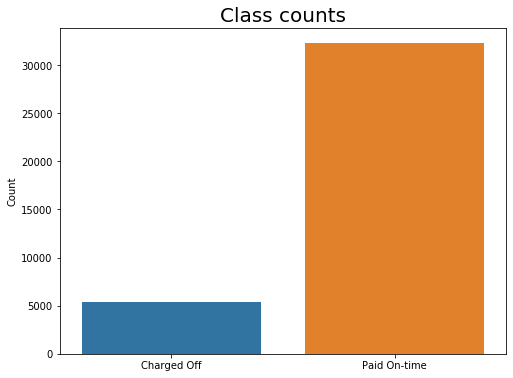

In [40]:
pos = cleaned_loans[cleaned_loans["loan_status"] == 1].shape[0]
neg = cleaned_loans[cleaned_loans["loan_status"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(cleaned_loans["loan_status"])
plt.xticks((0, 1), ["Charged Off", "Paid On-time"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

To handle imbalance data in classification problems we have few techniques

1)Oversampling

2)Undersampling

3)Penalty for misclassification of minority class.

We have to handle this scenario based on our objective, our objective is as a point of view of conservative investor more concern about false positive i.e we are predicting 1 which is 0 is more loss for our investor than false negative.

Undersampling - we can't do this because we will lose some information this technique is good if we have huge like millions of data.

Oversampling - If we do oversampling the true proportion of data is missing i.e reality we training classifier with wrong proportion we have to mindfull based on our objective.

So penalty method i choose here while model training we will tell to the classifier give more penalty for misclassification of minority class

## Modeling

Now our dataset has no missing values and all columns are numeric so it's ready for modeling to make predictions.
Here we are solving binary classification problem so the first good algorithm is Logistic Regression.

-->it's quick to train and we can iterate more quickly

-->it's less prone to overfitting than more complex models like decision trees

-->it's easy to interpret.

### Logistic Regression

In [41]:
features = cleaned_loans.drop('loan_status',axis=1)
target = cleaned_loans['loan_status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 10,stratify = target )

In [115]:
lr=LogisticRegression()
model=lr.fit(X_train,y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
probs=model.predict_proba(X_test)
preds = probs[:,1]

In [117]:
metrics.roc_auc_score(y_test,preds)

0.5634995762425632

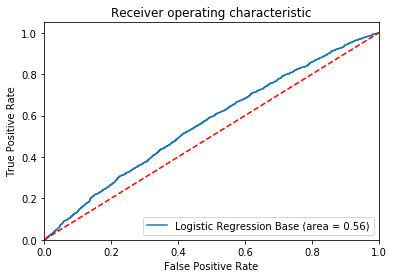

In [118]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### After using class_weight paramater penalty

In [119]:
lr=LogisticRegression(class_weight = "balanced")
model=lr.fit(X_train,y_train)

In [120]:
probs=model.predict_proba(X_test)
preds = probs[:,1]

In [121]:
metrics.roc_auc_score(y_test,preds)

0.6329037274437115

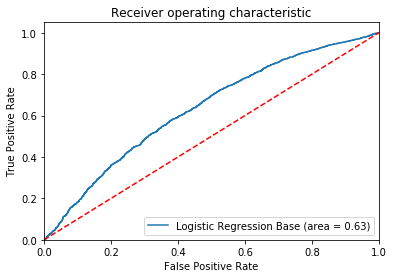

In [122]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Hyper parameter Tuning

In [123]:
param_grid = [
    {
        
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
        'class_weight' : ["balanced",{0:10,1:1},{0:100,1:1}]
    
    }]

In [124]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [132]:
logreg_cv = GridSearchCV(LogisticRegression(), param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print('Log Reg Best Parameter & Score:')
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)


Log Reg Best Parameter & Score:
{'C': 29.763514416313132, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0.6630140239069602


In [133]:
probs=logreg_cv.predict_proba(X_test)
preds = probs[:,1]

In [134]:
metrics.roc_auc_score(y_test,preds)

0.7011681965223159

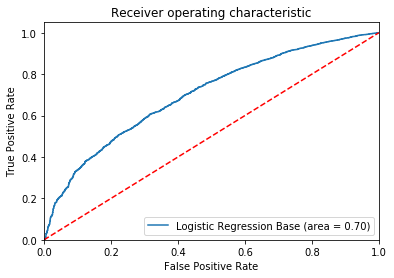

In [135]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

After hyper parameter tuning we improved our auc score almost from 63 to 70%

Let's try some more ensembles classifiers

## Random Forest Classifier

In [176]:
rf=RandomForestClassifier(class_weight = "balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150)

In [177]:
probs=rf.predict_proba(X_test)
preds=probs[:,1]

In [178]:
metrics.roc_auc_score(y_test,preds)

0.6864157935807741

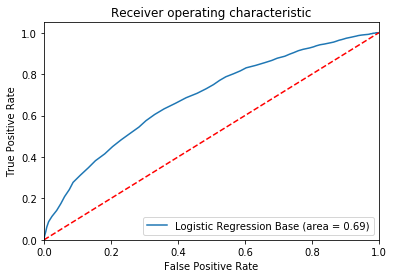

In [179]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Xgboost Ensemble

In [156]:
from xgboost import XGBClassifier

In [169]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [170]:
probs=xgb.predict_proba(X_test)
preds=probs[:,1]

In [171]:
metrics.roc_auc_score(y_test,preds)

0.7028375594789564

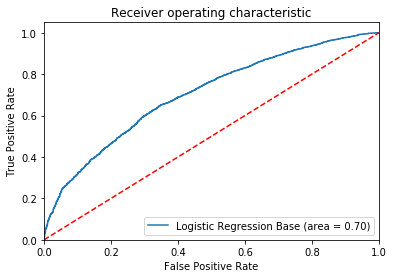

In [172]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Conclusion

As we try different models like logistic regression,Hyper parameter tuning for logistic regression , and also used some ensemble methods like random forest and xgboost

We got good roc_auc score for logistic regression 70% after hyper parameter tuning and xgboost classifier directly given 70% on imbalanced data so in conclusion we can go for logistic regression for out loan paid on time prediction as popuplar in industry too.